# CUSTOMER PURCHASE BEHAVIOR & TREND ANALYSIS

This project analyzes **customer shopping behavior and purchasing trends** using transactional retail data. It combines **Python-based exploratory data analysis (EDA)** with **SQL-driven insights** to extract meaningful patterns that can support data-driven business decisions.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## DATA LOADING

In [2]:
df= pd.read_csv(r"customer_shopping_behavior.csv")

In [3]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


## DATA EXPLORATION & CLEANING

In [4]:
# show the shape of dataset
df.shape

(3900, 18)

In [5]:
# show all columns name
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [6]:
# Renaming columns according to snake casing for better readability
df.columns=df.columns.str.lower().str.replace(" ","_")
df= df.rename(columns={'purchase_amount_(usd)':'purchase_amount'})

In [7]:
# Re-checking the columns name
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')

In [8]:
# information about datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             3900 non-null   int64  
 1   age                     3900 non-null   int64  
 2   gender                  3900 non-null   object 
 3   item_purchased          3900 non-null   object 
 4   category                3900 non-null   object 
 5   purchase_amount         3900 non-null   int64  
 6   location                3900 non-null   object 
 7   size                    3900 non-null   object 
 8   color                   3900 non-null   object 
 9   season                  3900 non-null   object 
 10  review_rating           3863 non-null   float64
 11  subscription_status     3900 non-null   object 
 12  shipping_type           3900 non-null   object 
 13  discount_applied        3900 non-null   object 
 14  promo_code_used         3900 non-null   

In [9]:
# Summary statistics
df.describe()

,customer_id,age,purchase_amount,review_rating,previous_purchases
count,3900.000000,3900.000000,3900.000000,3863.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.750065,25.351538
std,1125.977353,15.207589,23.685392,0.716983,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.800000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [10]:
# Checking if missing data or null values are present
df.isnull().sum()

customer_id                0
age                        0
gender                     0
item_purchased             0
category                   0
purchase_amount            0
location                   0
size                       0
color                      0
season                     0
review_rating             37
subscription_status        0
shipping_type              0
discount_applied           0
promo_code_used            0
previous_purchases         0
payment_method             0
frequency_of_purchases     0
dtype: int64

In [11]:
# Total null value
df.isnull().sum().sum()

np.int64(37)

There are total 37 null values in Review Rating column

In [12]:
# Update missing values with the median rating of the product category
df['review_rating'] = df.groupby('category')['review_rating'].transform(lambda x: x.fillna(x.median()))

In [13]:
# Total null value
df.isnull().sum().sum()

np.int64(0)

In [14]:
# Check if duplicate rows are present
duplicate_rows = df.duplicated().sum()
print(f"Total duplicate rows: {duplicate_rows}")

Total duplicate rows: 0


## DATA PREPROCESSING

In [15]:
# create new column age group

labels=["Young","Adult","Middle-aged","Senior"]
bins = [0, 18, 35, 60, np.inf]

df['age_group']=pd.cut(df['age'], bins=bins, labels=labels)

In [16]:
df[['age','age_group']].head(10)

,age,age_group
0,55,Middle-aged
1,19,Adult
2,50,Middle-aged
3,21,Adult
4,45,Middle-aged
5,46,Middle-aged
6,63,Senior
7,27,Adult
8,26,Adult
9,57,Middle-aged


In [17]:
# create new column purchases_frequency_days
frequency_map={
    'Fortnightly':14,
    'Weekly':7,
    'Bi-Weekly':14,
    'Monthly':30,
    'Quarterly':90,
    'Annually':365,
    'Every 3 Months':90
}
df['purchases_frequency_days']=df['frequency_of_purchases'].map(frequency_map)

In [18]:
df[['frequency_of_purchases','purchases_frequency_days']].head()

,frequency_of_purchases,purchases_frequency_days
0,Fortnightly,14
1,Fortnightly,14
2,Weekly,7
3,Weekly,7
4,Annually,365


In [19]:
df[['discount_applied', 'promo_code_used']].head(10)

,discount_applied,promo_code_used
0,Yes,Yes
1,Yes,Yes
2,Yes,Yes
3,Yes,Yes
4,Yes,Yes
5,Yes,Yes
6,Yes,Yes
7,Yes,Yes
8,Yes,Yes
9,Yes,Yes


In [20]:
(df['discount_applied']==df['promo_code_used']).all()

np.True_

In [21]:
# dropping promo code used column
df = df.drop('promo_code_used', axis=1)

## EXPLORATORY DATA ANALYSIS (EDA)

### Univariate Analysis (Individual Variables)

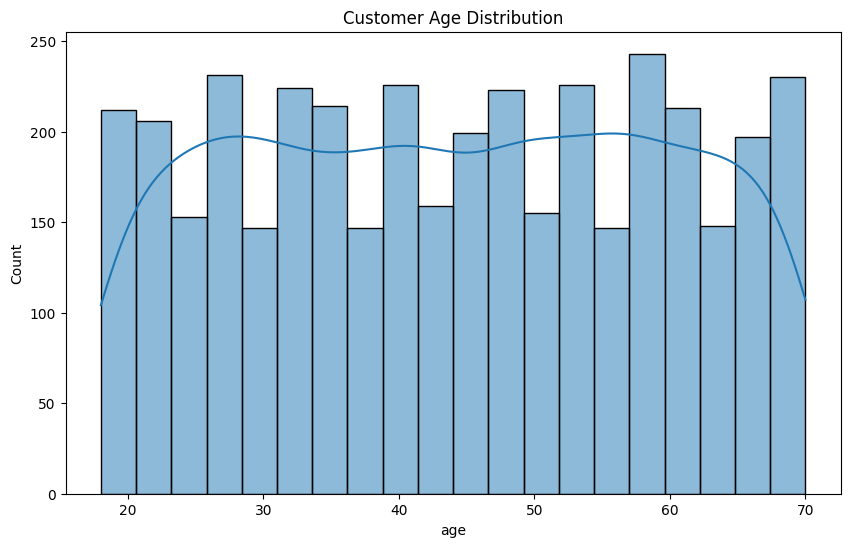

In [22]:
# Customer Age Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['age'],bins=20,kde=True)
plt.title('Customer Age Distribution')
plt.show()

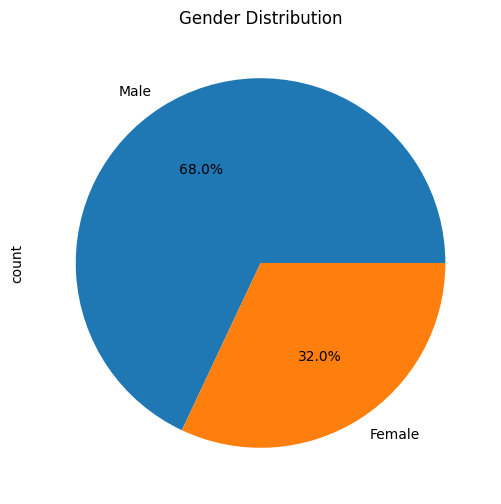

In [23]:
# Gender Distribution
plt.figure(figsize=(6,6))
df['gender'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.show()

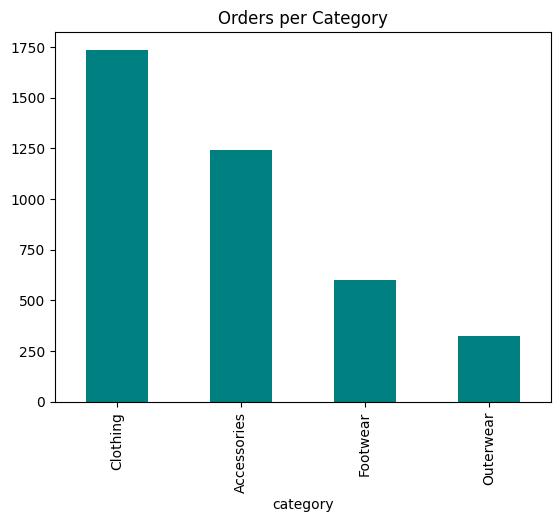

In [24]:
# Category Popularity
df['category'].value_counts().plot(kind='bar', color='teal')
plt.title('Orders per Category')
plt.show()

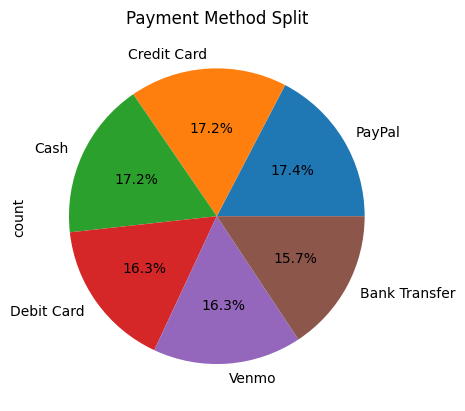

In [25]:
# Payment method distribution
df['payment_method'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Payment Method Split')
plt.show()

### Bivariate Analysis (Relationships)

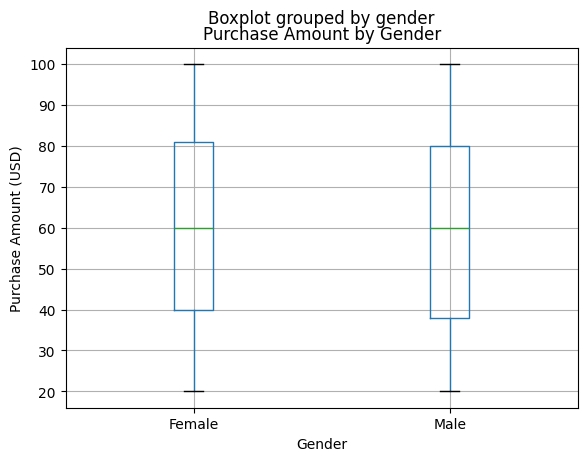

In [26]:
# Purchase Amount Analysis by Gender
df.boxplot(column='purchase_amount', by='gender')
plt.title("Purchase Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Purchase Amount (USD)")
plt.show()

C:\Users\SUJATA SINHABABU\AppData\Local\Temp\ipykernel_13808\656064012.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='purchase_amount', data=df, estimator=np.mean, palette='viridis')


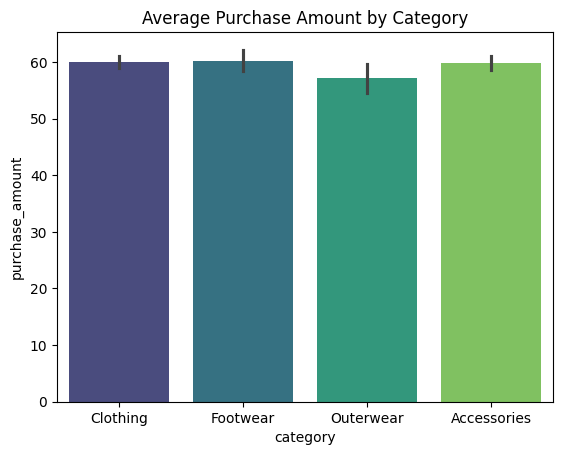

In [27]:
# Average Purchase Amount Analysis by Category
sns.barplot(x='category', y='purchase_amount', data=df, estimator=np.mean, palette='viridis')
plt.title('Average Purchase Amount by Category')
plt.show()

Text(0.5, 1.0, 'Avg Spend: Gender & Subscription')

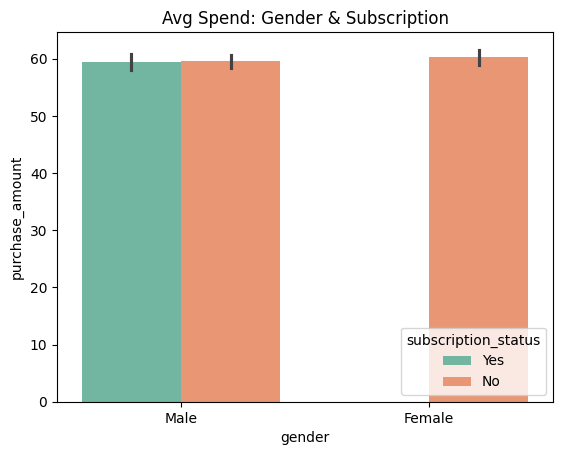

In [28]:
sns.barplot(x='gender', y='purchase_amount', hue='subscription_status', data=df, palette='Set2')
plt.title('Avg Spend: Gender & Subscription')

### Multivariate Analysis

C:\Users\SUJATA SINHABABU\AppData\Local\Temp\ipykernel_13808\3198237442.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette='rocket')


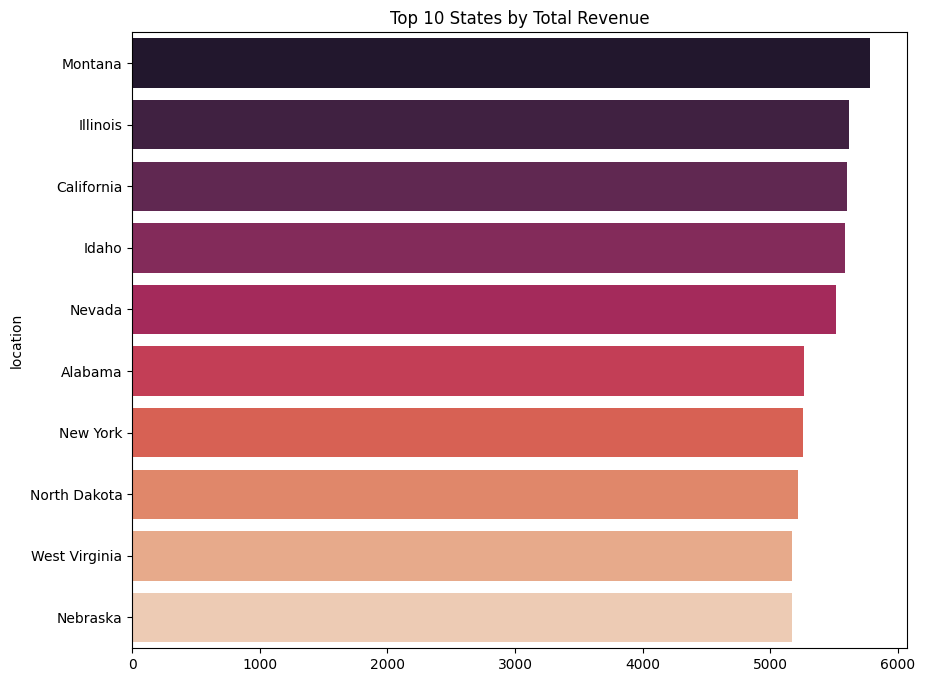

In [29]:
plt.figure(figsize=(10, 8))
top_states = df.groupby('location')['purchase_amount'].sum().nlargest(10)
sns.barplot(x=top_states.values, y=top_states.index, palette='rocket')
plt.title('Top 10 States by Total Revenue')
plt.show()

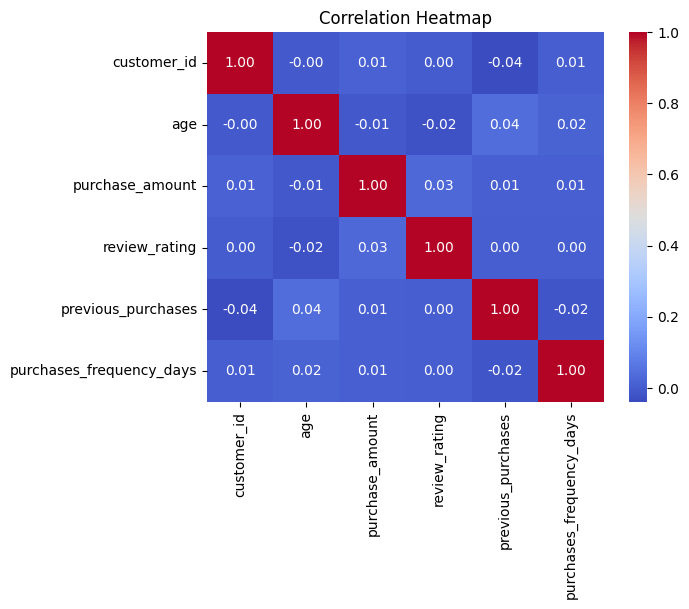

In [30]:
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## CONNECT TO MySQL 

In [31]:
!pip install python-dotenv
!pip install sqlalchemy pymysql

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

load_dotenv()

True

In [33]:
engine = create_engine(
    f"mysql+pymysql://{os.getenv('MYSQL_USER')}:{os.getenv('MYSQL_PASSWORD')}@"
    f"{os.getenv('MYSQL_HOST')}:{os.getenv('MYSQL_PORT')}/{os.getenv('MYSQL_DB')}"
)

print("Connected to MySQL successfully!")

Connected to MySQL successfully!


In [34]:
table_name = "customer" 
df.to_sql(table_name, engine, if_exists="replace", index=False)

print("Data successfully loaded into MySQL table")


Data successfully loaded into MySQL table
